### Scrapping Tweets

Documentaion of Twint : https://github.com/twintproject/twint

Here we use Twint api  scarpe data from twitter.We consider tweets of any user 

### Importing libraries for scrapping

In [ ]:
import twint 
import nest_asyncio
import pandas as pd
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

import warnings
warnings.simplefilter('ignore')

* in the scrape_user function we can input the username of the person , list of words that want to search on user tweets also date from which we want to scrape the tweet 

In [ ]:
def scrape_user():
    print ("Fetching Tweets")
    c = twint.Config(Retweets=True)
    c.Username = input('Username: \n')
    input_string = input("Enter a list strings(related to user if no give blank) separated by space ")
    c.Search = input_string.split()
    print('Enter the date since we want to scarp\n')
    c.Since = input('Date (format: "%Y-%m-%d %H:%M:%S"): \n')
    c.Pandas = True
    #c.Images= True
    #c.Vidoes = True
    c.Media = True
   
    twint.run.Search(c)
    Tweets_df = twint.storage.panda.Tweets_df
    return( Tweets_df)

In [ ]:
tweets=scrape_user()

Fetching Tweets
Username: 
narendramodi
Enter a list strings(related to user if no give blank) separated by space bjp
Enter the date since we want to scarp

Date (format: "%Y-%m-%d %H:%M:%S"): 
2018-01-01
1309141433203527686 2020-09-24 14:43:35 +0000 <narendramodi> Pandit Deendayal Upadhyaya Ji’s ideals inspire us to serve the poor and ensure a positive difference in their lives.   On his Jayanti tomorrow, 25th September at 11 AM, I would be addressing @BJP4India Karyakartas from all over India.   Do watch.  https://t.co/7sFPFWwiXF
1286344650299768834 2020-07-23 16:57:18 +0000 <narendramodi> Met @BJP4Gujarat President Shri @CRPaatil Ji. Hailing from a humble background, he rose the ranks in the Party and distinguished himself as an outstanding Karyakarta. His work as MP has also been appreciated. Am sure under his leadership the Gujarat BJP will scale newer heights.  https://t.co/bzCoTZL6ZP
1285915339453165569 2020-07-22 12:31:22 +0000 <narendramodi> Had an excellent interaction with t

In [ ]:
tweets.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1309141433203527686,1309141433203527686,1.600959e+12,2020-09-24 14:43:35,+0000,,Pandit Deendayal Upadhyaya Ji’s ideals inspire...,en,[],[],...,,,,,,[],,,,
1,1286344650299768834,1286344650299768834,1.595523e+12,2020-07-23 16:57:18,+0000,,Met @BJP4Gujarat President Shri @CRPaatil Ji. ...,en,[],[],...,,,,,,[],,,,


* From above data frame we see that tweets include other langauges other than english, we want consider only english.so we drop all other rows

In [ ]:
tweets=tweets[(tweets['language']=='en') | (tweets['language']=='und') ]

In [ ]:
tweets.head(5)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1309141433203527686,1309141433203527686,1.600959e+12,2020-09-24 14:43:35,+0000,,Pandit Deendayal Upadhyaya Ji’s ideals inspire...,en,[],[],...,,,,,,[],,,,
1,1286344650299768834,1286344650299768834,1.595523e+12,2020-07-23 16:57:18,+0000,,Met @BJP4Gujarat President Shri @CRPaatil Ji. ...,en,[],[],...,,,,,,[],,,,
2,1285915339453165569,1285915339453165569,1.595421e+12,2020-07-22 12:31:22,+0000,,Had an excellent interaction with the newly el...,en,[],[],...,,,,,,[],,,,
3,1285402668182040576,1285402668182040576,1.595299e+12,2020-07-21 02:34:12,+0000,,Shri Lalji Tandon will be remembered for his u...,en,[],[],...,,,,,,[],,,,
4,1279325250514071553,1279325250514071553,1.593850e+12,2020-07-04 08:04:43,+0000,,"For @BJP4India Karyakartas, serving the nation...",en,[],[],...,,,,,,[],,,,


In [ ]:
tweets.shape

(209, 38)

### Extracting date, time and tweet

In [ ]:
data=tweets[['date','tweet']]
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.head()

,date,tweet
0,2020-09-24 14:43:35,Pandit Deendayal Upadhyaya Ji’s ideals inspire...
1,2020-07-23 16:57:18,Met @BJP4Gujarat President Shri @CRPaatil Ji. ...
2,2020-07-22 12:31:22,Had an excellent interaction with the newly el...
3,2020-07-21 02:34:12,Shri Lalji Tandon will be remembered for his u...
4,2020-07-04 08:04:43,"For @BJP4India Karyakartas, serving the nation..."


### Import Libraries for NLP

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import spacy

In [ ]:
def get_hashtags(text):
    """ Extract hashtags from tweet """
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    """ Extract mentions from tweet """
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

### Feature Engineering

In [ ]:
# feature engineering on date column
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
data['hour']=data['date'].apply(lambda x: x.hour)

# feature engineering on tweet column
data['length']=data['tweet'].apply(lambda x: len(x.split()))
data['hashtags']=data['tweet'].apply(lambda x: get_hashtags(x))
data['mentions']=data['tweet'].apply(lambda x: get_mentions(x))


In [ ]:
data.tail()

,date,tweet,month,year,hour,length,hashtags,mentions
204,2018-02-18 11:50:22,Today I was delighted to be a part of the prog...,2,2018,11,45,[],[@bjp4india]
205,2018-02-15 15:32:54,BJP seeks an opportunity to serve Tripura. The...,2,2018,15,33,[],[]
206,2018-02-15 15:24:36,"Wherever I travelled across Tripura, people tu...",2,2018,15,22,[],[]
207,2018-02-15 15:20:37,I thank my sisters and brothers of Tripura for...,2,2018,15,27,[],[]
208,2018-02-08 11:21:38,"BJP’s priorities in Tripura are trade, tourism...",2,2018,11,21,[],[@bjp4tripura]


### Cleaning the Tweet

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
stemmer = PorterStemmer()#stemming
stop_words = spacy.lang.en.stop_words.STOP_WORDS#loading the stop words from spacy

In [ ]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls(links)
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False):
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize the tweet
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text] # stemming
    return ' '.join(clean_text)

In [ ]:
data['cleaned_tweets']=data['tweet'].apply(lambda x: process_text(x))
data['tweet']=data['tweet'].apply(lambda x: remove_content(x))

In [ ]:
data.head(3)

,date,tweet,month,year,hour,length,hashtags,mentions,cleaned_tweets
0,2020-09-24 14:43:35,Pandit Deendayal Upadhyaya Ji’s ideals inspire...,9,2020,14,41,[],[@bjp4india],pandit deendayal upadhyaya ji ideals inspire s...
1,2020-07-23 16:57:18,Met President Shri Ji. Hailing from a humble...,7,2020,16,46,[],"[@bjp4gujarat, @crpaatil]",met president shri ji hailing humble backgroun...
2,2020-07-22 12:31:22,Had an excellent interaction with the newly el...,7,2020,12,43,[],[@bjp4india],excellent interaction newly elected rajya sabh...


### Text Analysis

In [ ]:
tweet_list = data['cleaned_tweets'].tolist()
all_words=' '.join(tweet_list).split()# converting each tweet into word

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import plotly.express as px
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)# count vectorizer
    X=c.fit_transform(sentences)# fit and transform
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)# craeting dataframe from top 20 words based on count vectorizer
    plt.figure(figsize=(20, 8))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    ax = sns.barplot(x='index',y=0,data=res,color='blue')
    labels = ax.get_xticklabels() 
    ax.set_ylabel('Count')
    ax.set_xlabel('Phrases')
    ax.set_xticklabels(labels, rotation=70,size = 15)
    plt.show()

##### Frequent unigrams

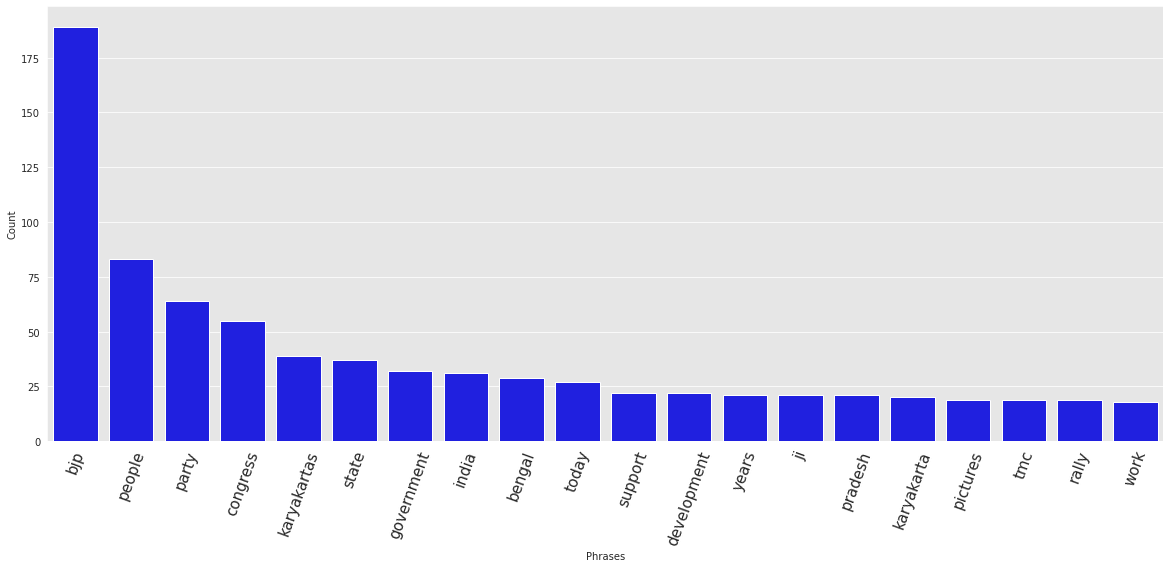

In [ ]:
plot_topn(tweet_list, ngram_range=(1,1))

### Frequent bigrams

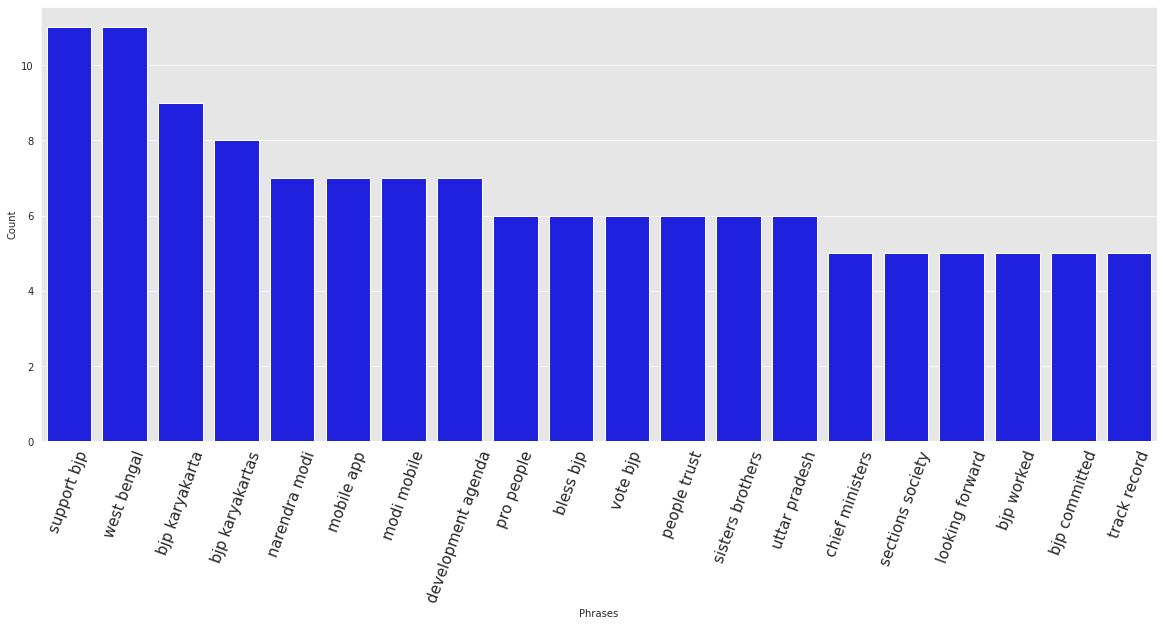

In [ ]:
plot_topn(tweet_list, ngram_range=(2,2))

#### Frequent trigrams

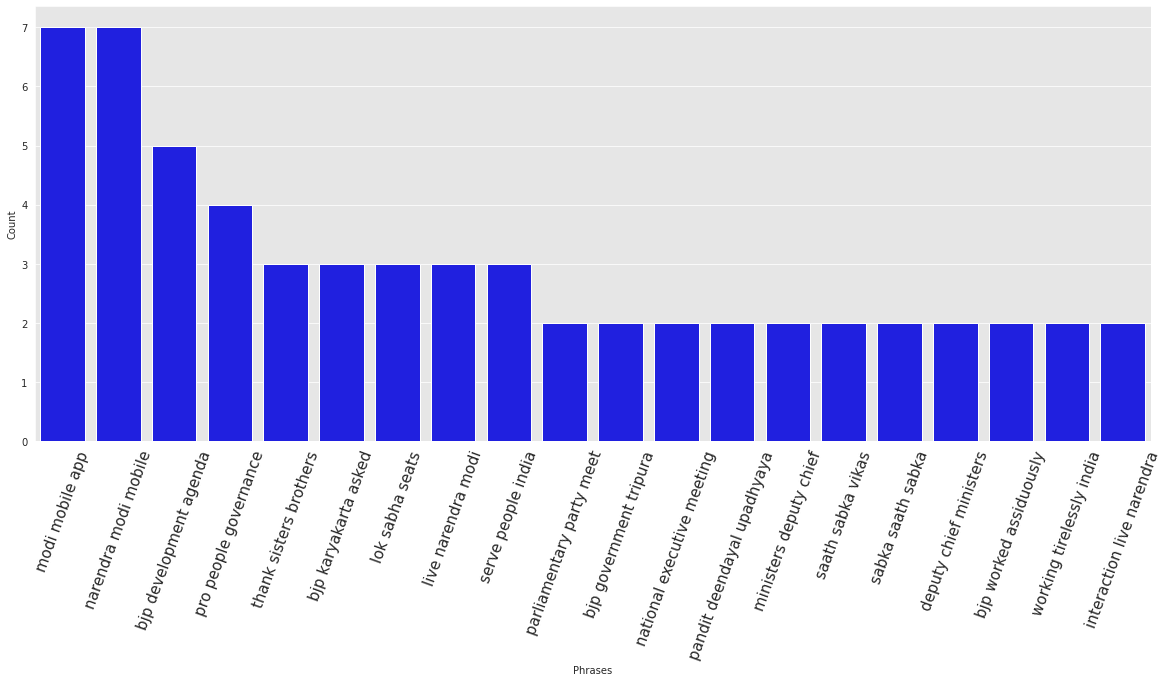

In [ ]:
plot_topn(tweet_list, ngram_range=(3,3))

#### Frequent bigrams and trigrams 

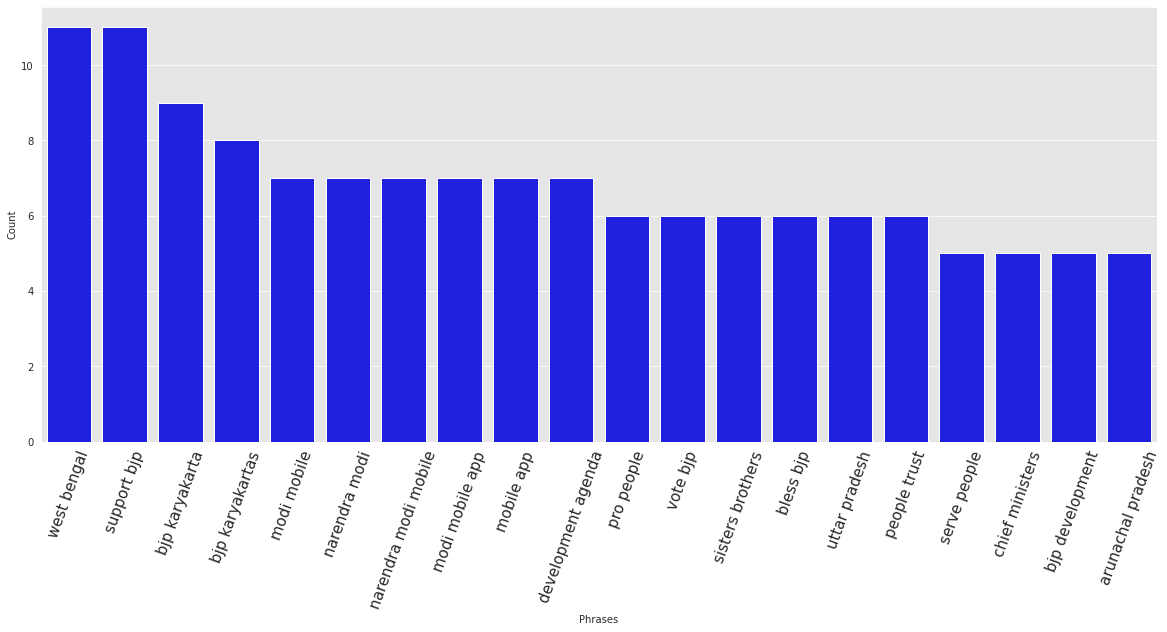

In [ ]:
plot_topn(tweet_list, ngram_range=(2,3))

###  Hashtags

In [ ]:
hashes=data['hashtags'].tolist()
tags=[]
for x in hashes:
    if x:
        tags.extend(x)
print(len(tags))        

12


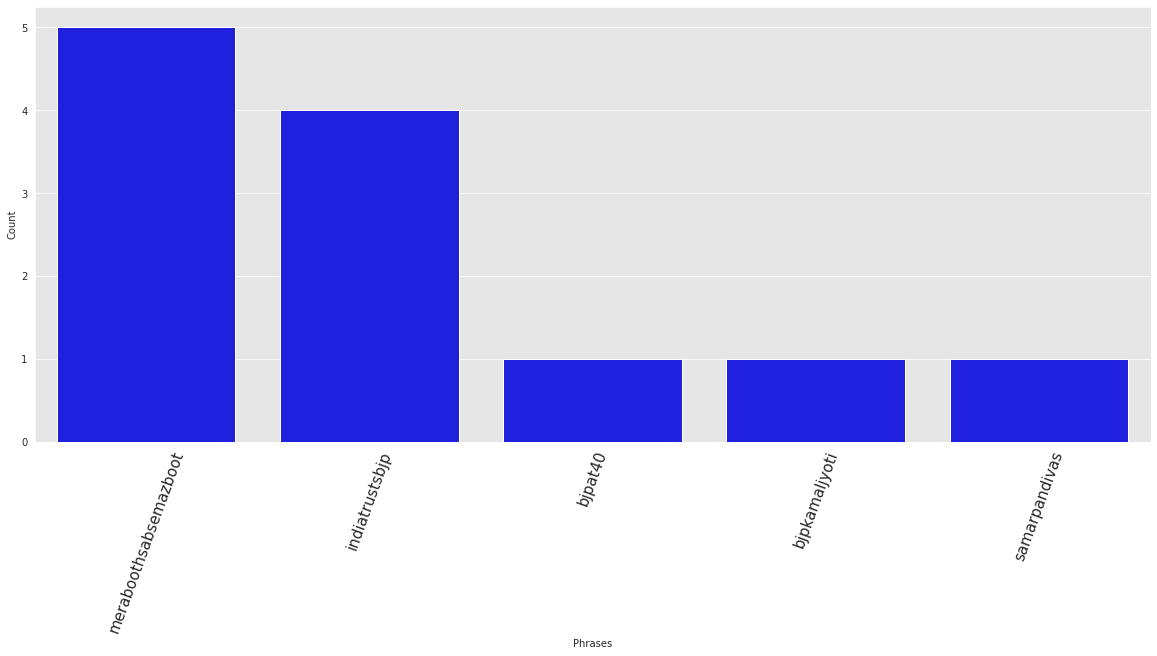

In [ ]:
plot_topn(tags)

### Mentions

In [ ]:
mentions=data['mentions'].tolist()
ment=[]
for x in mentions:
    if x:
        ment.extend(x)
len(ment)

73

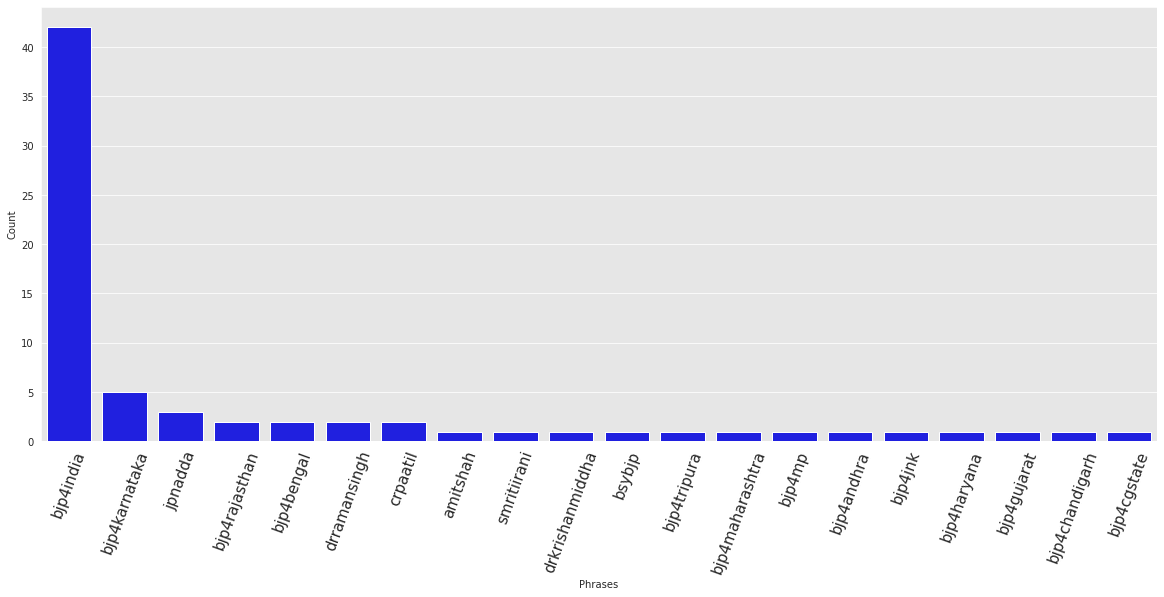

In [ ]:
plot_topn(ment)

### Sentiment Analysis

In [ ]:
from textblob import TextBlob
data['sentiment']=data['tweet'].apply(lambda x:TextBlob(x).sentiment[0])
data['subject']=data['tweet'].apply(lambda x: TextBlob(x).sentiment[1])
data['polarity']=data['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')#adding polarity positive or negativeS

In [ ]:
data.head()

,date,tweet,month,year,hour,length,hashtags,mentions,cleaned_tweets,sentiment,subject,polarity
0,2020-09-24 14:43:35,Pandit Deendayal Upadhyaya Ji’s ideals inspire...,9,2020,14,41,[],[@bjp4india],pandit deendayal upadhyaya ji ideals inspire s...,-0.086364,0.572727,neg
1,2020-07-23 16:57:18,Met President Shri Ji. Hailing from a humble...,7,2020,16,46,[],"[@bjp4gujarat, @crpaatil]",met president shri ji hailing humble backgroun...,0.320000,0.642778,pos
2,2020-07-22 12:31:22,Had an excellent interaction with the newly el...,7,2020,12,43,[],[@bjp4india],excellent interaction newly elected rajya sabh...,0.491775,0.648773,pos
3,2020-07-21 02:34:12,Shri Lalji Tandon will be remembered for his u...,7,2020,2,45,[],[],shri lalji tandon remembered untiring efforts ...,0.200000,0.622222,pos
4,2020-07-04 08:04:43,"For Karyakartas, serving the nation comes fir...",7,2020,8,43,[],[@bjp4india],karyakartas serving nation comes challenging t...,0.375000,0.666667,pos


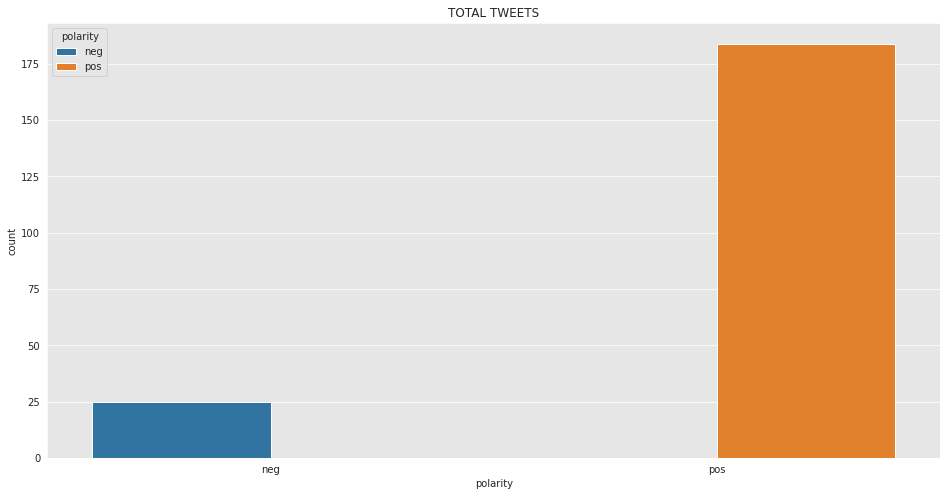

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.countplot(x='polarity',data=data,hue="polarity").set_title('TOTAL TWEETS')


Text(0.5, 1.0, 'SUBJECTIVE TWEETS')

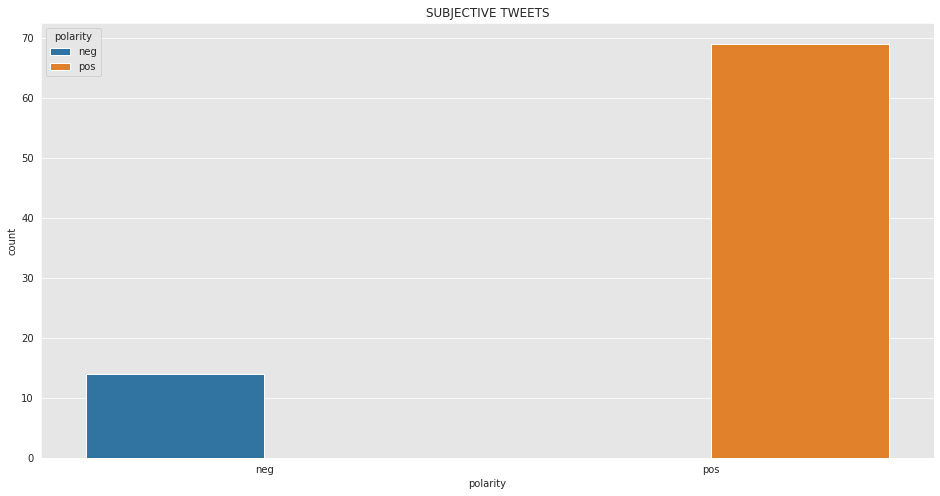

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.countplot(data=data[data['subject']>0.5],x="polarity",hue='polarity').set_title('SUBJECTIVE TWEETS')


### Word cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
temp=' '.join(data['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(temp)

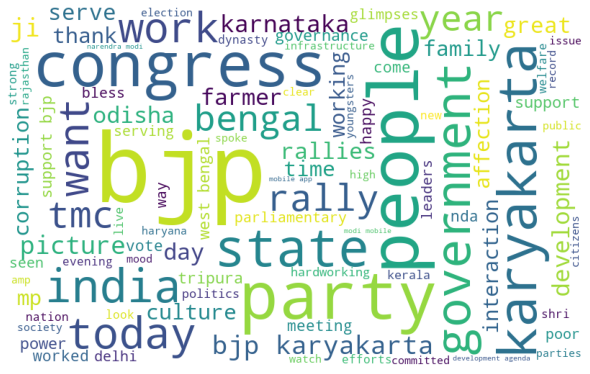

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

### Nlp Models

In [ ]:

from gensim import corpora
r = [process_text(x,stem=False).split() for x in data['tweet'].tolist()] 
dictionary = corpora.Dictionary(r)
corpus = [dictionary.doc2bow(rev) for rev in r]

In [ ]:
from gensim import models
model = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=30)
topics = model.print_topics(num_words=8)
for topic in topics:
    print(topic[0],process_text(topic[1]))

0 bjp people congress karyakartas state party bengal government
1 bjp party government people work odisha karyakartas met
2 bjp congress today party politics ji sector way
3 bjp people india pradesh state party sisters brothers
4 bjp people party india meeting support parliamentary pictures


In [ ]:
labels=[]
for x in model[corpus]:
    labels.append(sorted(x,key=lambda x: x[1],reverse=True)[0][0])
data['topics']=pd.Series(labels)

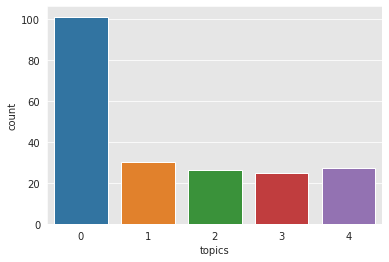

In [ ]:
fig=sns.countplot(data=data,x='topics')
plt.show()

###  Conclusion


* We want to provide twitter username and date from which we want to scrape.
* To get the personnel behaviour of the user we can select different set of key words that we want to search on the user tweets.
* While setting up the search words we get opinion of user related to specific topic
* Using hastags we can get interseted realted to user.
* After alll these analysis we get idea about what type of person is(users religious view,politics,how user responds to different topics in the country)

* Main disadvantage of this analysis if the person not frequently tweeting, so data will be less.

### Big-Five Personality Model 

* Big- five model can be implemented using occurence specific types of words, number of tweets, number of hashtags and mentions ,number of replies ,number of likes,images in tweets, number of retweets ,sentiment of overall tweets.
* specific types of words means related to emotions,family,religion,work,money,achievement,health,hearing,feeling,quantifiers,death etc....
* By considering all above things we can make prediction to predict person into a 5 category